In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.calibration import CalibrationDisplay
import matplotlib.pyplot as plt

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import BinaryCrossentropy

In [2]:
# Load the dataset
df = pd.read_csv("../dataset/complex_engineered/augmented_data.csv")

In [32]:
# 1. ROC Curve and AUC
def roc_curve_and_auc(y_val, y_prob,title):
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(10, 6))
    
    # plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.2f})")
    plt.plot(fpr, tpr, label=title+ f" (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.50)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

In [4]:
# 2. Goal Rate by Percentile (Binned by 5%)
def goal_rate_by_percentile(y_val, y_prob):
    df_val = pd.DataFrame({'y_val': y_val, 'y_prob': y_prob})
    df_val['percentile'] = pd.qcut(df_val['y_prob'], 100, labels=False, duplicates='drop') + 1  # Percentiles from 1 to 100
    goal_rate_by_percentile = df_val.groupby('percentile')['y_val'].mean()

    plt.figure(figsize=(10, 6))
    plt.plot(goal_rate_by_percentile.index, goal_rate_by_percentile, marker='o')
    plt.title("Goal Rate by Percentile")
    plt.xlabel("Model Percentile")
    plt.ylabel("Goal Rate (#goals / (#goals + #no_goals))")
    plt.show()


In [5]:
# 3. Cumulative Proportion of Goals by Percentile
def cumulative_proportion_of_goals(y_val, y_prob):
    df_val = pd.DataFrame({'y_val': y_val, 'y_prob': y_prob})
    cumulative_goals = df_val.sort_values('y_prob', ascending=False)['y_val'].cumsum()
    total_goals = df_val['y_val'].sum()
    cumulative_goal_percentage = cumulative_goals / total_goals

    plt.figure(figsize=(10, 6))
    plt.plot(np.linspace(0, 1, len(cumulative_goal_percentage)), cumulative_goal_percentage, marker='o')
    plt.title("Cumulative Proportion of Goals by Model Percentile")
    plt.xlabel("Model Percentile")
    plt.ylabel("Cumulative Proportion of Goals")
    plt.show()

    # 4. Reliability Diagram (Calibration Curve)
    CalibrationDisplay.from_predictions(y_val, y_prob, n_bins=10, strategy='uniform')
    plt.title("Reliability Diagram (Calibration Curve)")
    plt.show()

In [6]:
features = ['distance_from_net', 'angle_from_net']
X = df[features]
X.fillna(X.mean(), inplace=True)
y = df['is_goal']
y.fillna(0, inplace=True)

C:\Users\liyua\AppData\Local\Temp\ipykernel_13008\1637390586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [7]:
# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# # DecisionTree Models
# dt_models = {
#     "Distance Only": DecisionTreeClassifier(random_state=42).fit(X_train[['distance_from_net']], y_train),
#     "Angle Only": DecisionTreeClassifier(random_state=42).fit(X_train[['angle_from_net']], y_train),
#     "Distance + Angle": DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
# }

# # Random Forest Models
# rf_models = {
#     "Distance Only": RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train[['distance_from_net']], y_train),
#     "Angle Only": RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train[['angle_from_net']], y_train),
#     "Distance + Angle": RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
# }
# # Neural Network Models
# nn_models = {
#     "Distance Only": MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', solver='adam', max_iter=200, random_state=42).fit(X_train[['distance_from_net']], y_train),
#     "Angle Only": MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', solver='adam', max_iter=200, random_state=42).fit(X_train[['angle_from_net']], y_train),
#     "Distance + Angle": MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', solver='adam', max_iter=200, random_state=42).fit(X_train, y_train)
# }


In [28]:
# # Predictions
# dt_predictions = {
#     model_name: {
#         "y_pred": model.predict(X_val[features_subset]),
#         "y_prob": model.predict_proba(X_val[features_subset])[:, 1]
#     }
#     for model_name, (model, features_subset) in {
#         "Distance Only": (dt_models["Distance Only"], ['distance_from_net']),
#         "Angle Only": (dt_models["Angle Only"], ['angle_from_net']),
#         "Distance + Angle": (dt_models["Distance + Angle"], features)    
#     }.items()
# }


# rf_predictions = {
#     model_name: {
#         "y_pred": model.predict(X_val[features_subset]),
#         "y_prob": model.predict_proba(X_val[features_subset])[:, 1]
#     }
#     for model_name, (model, features_subset) in {
#         "Distance Only": (rf_models["Distance Only"], ['distance_from_net']),
#         "Angle Only": (rf_models["Angle Only"], ['angle_from_net']),
#         "Distance + Angle": (rf_models["Distance + Angle"], features)    
#     }.items()
# }

# nn_predictions = {
#     model_name: {
#         "y_pred": model.predict(X_val[features_subset]),
#         "y_prob": model.predict_proba(X_val[features_subset])[:, 1]
#     }
#     for model_name, (model, features_subset) in {
#         "Distance Only": (nn_models["Distance Only"], ['distance_from_net']),
#         "Angle Only": (nn_models["Angle Only"], ['angle_from_net']),
#         "Distance + Angle": (nn_models["Distance + Angle"], features)    
#     }.items()
# }


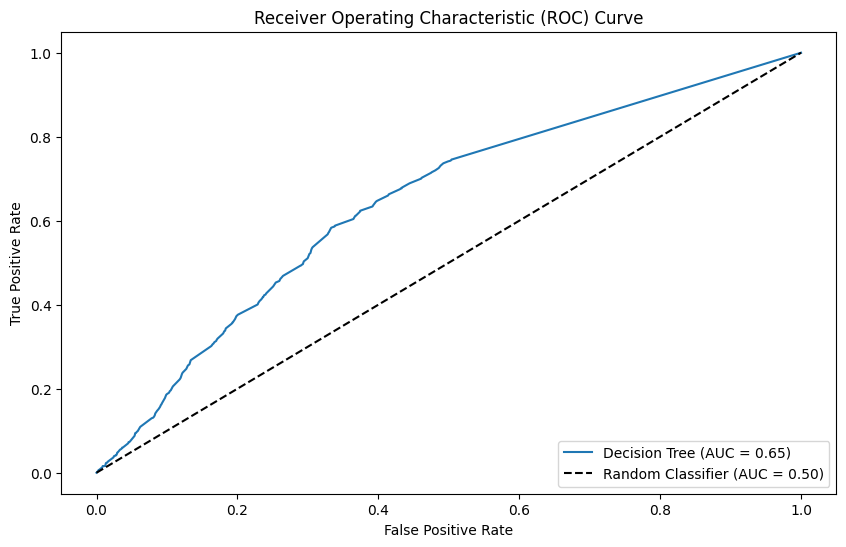

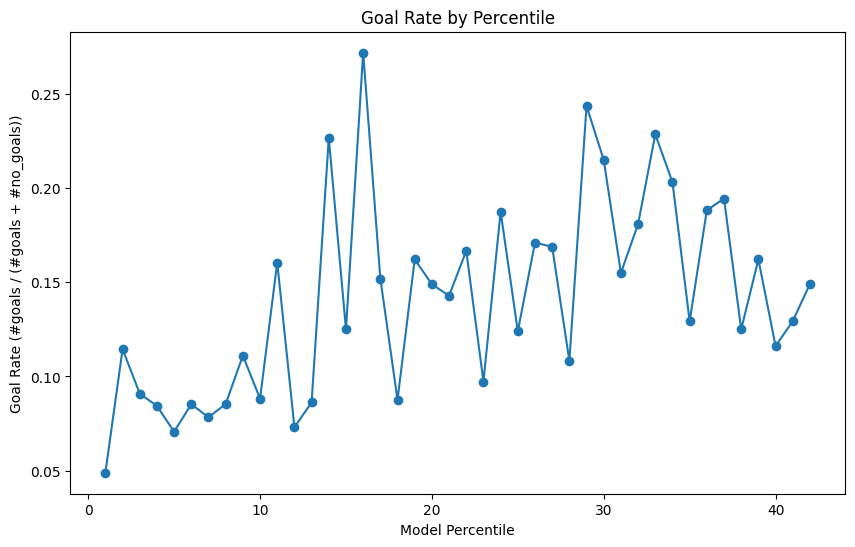

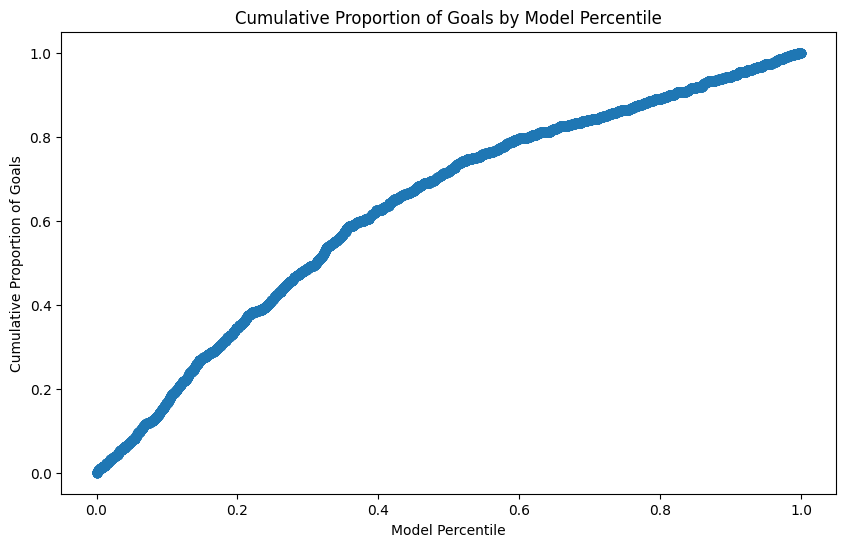

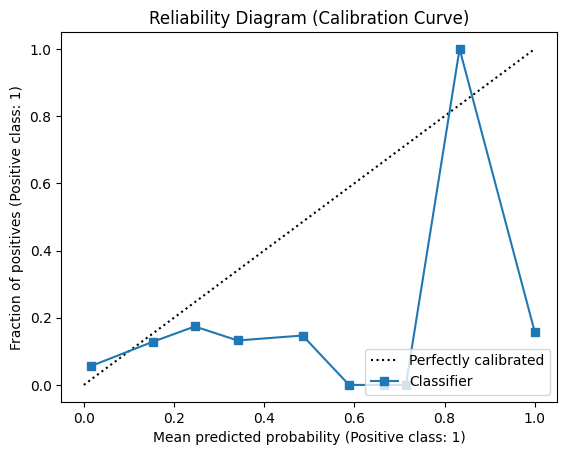

In [41]:
# Decision Tree 
# #  distance only
# roc_curve_and_auc(y_val, dt_predictions["Distance Only"]["y_prob"],"Decision Tree")
# goal_rate_by_percentile(y_val, dt_predictions["Distance Only"]["y_prob"])
# cumulative_proportion_of_goals(y_val, dt_predictions["Distance Only"]["y_prob"])

# # angle only
# roc_curve_and_auc(y_val, dt_predictions["Angle Only"]["y_prob"],"Decision Tree")
# goal_rate_by_percentile(y_val, dt_predictions["Angle Only"]["y_prob"])
# cumulative_proportion_of_goals(y_val, dt_predictions["Angle Only"]["y_prob"])

# #  distance + angle
# roc_curve_and_auc(y_val, dt_predictions["Distance + Angle"]["y_prob"],"Decision Tree")
# goal_rate_by_percentile(y_val, dt_predictions["Distance + Angle"]["y_prob"])
# cumulative_proportion_of_goals(y_val, dt_predictions["Distance + Angle"]["y_prob"])

# DecisionTree Models
dt_model =  DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
dt_predictions = {  
    "y_pred": dt_model.predict(X_val[features]),
    "y_prob": dt_model.predict_proba(X_val[features])[:, 1]
}

#  distance + angle
roc_curve_and_auc(y_val, dt_predictions["y_prob"],"Decision Tree")
goal_rate_by_percentile(y_val, dt_predictions["y_prob"])
cumulative_proportion_of_goals(y_val, dt_predictions["y_prob"])



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


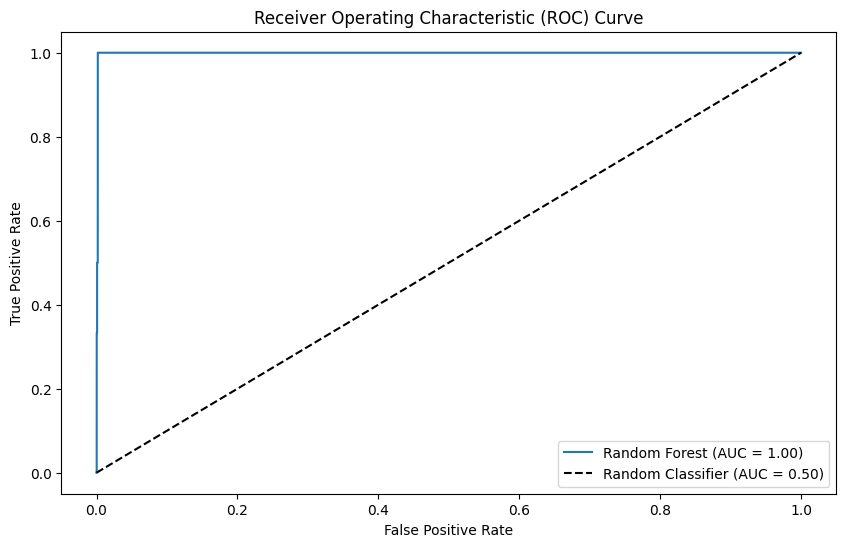

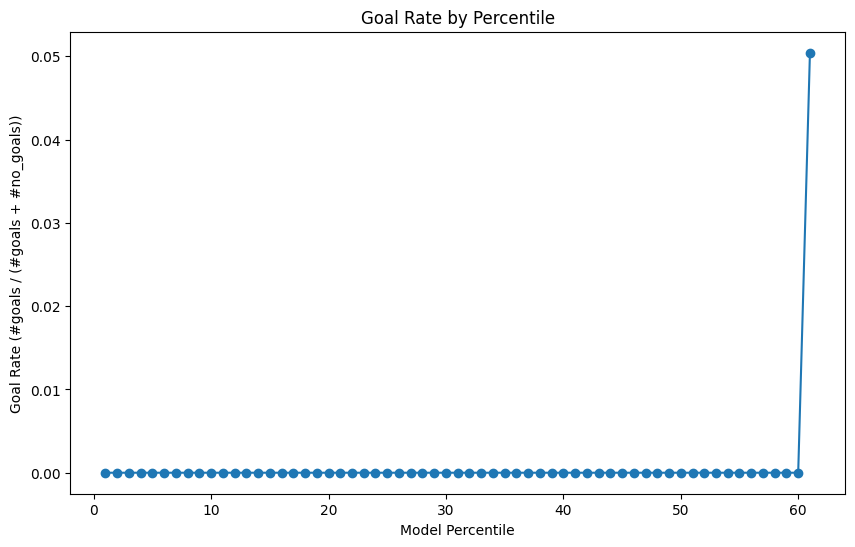

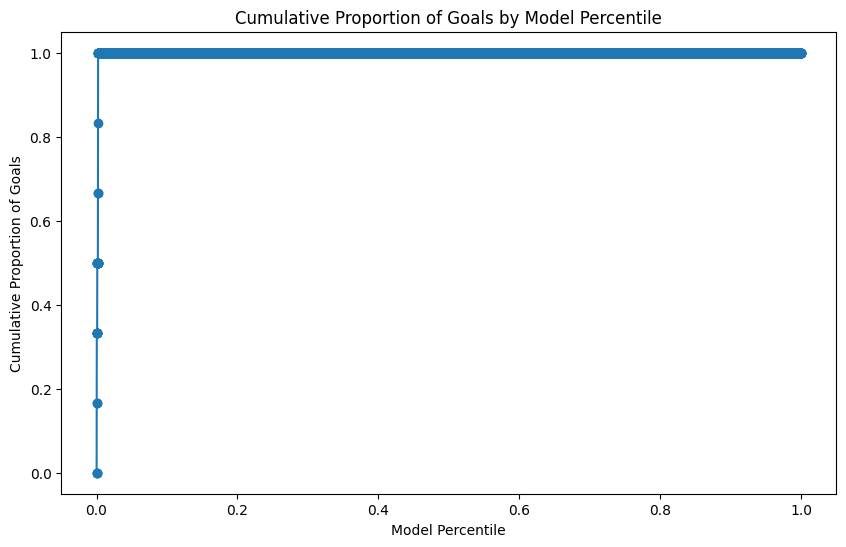

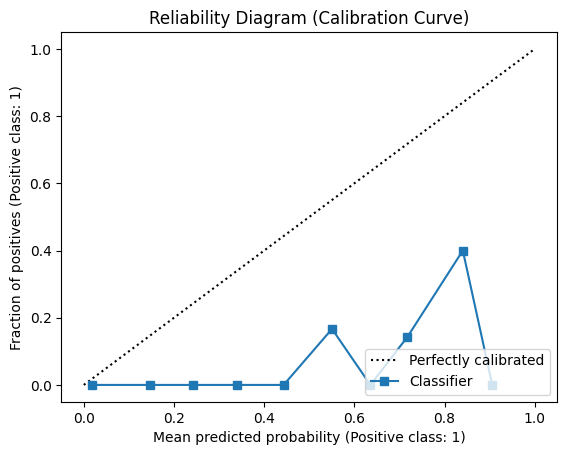

In [46]:

# Random Forest 
# #  distance only
# roc_curve_and_auc(y_val, rf_predictions["Distance Only"]["y_prob"],"Random Forest")
# goal_rate_by_percentile(y_val, rf_predictions["Distance Only"]["y_prob"])
# cumulative_proportion_of_goals(y_val, rf_predictions["Distance Only"]["y_prob"])

# #  angle only
# roc_curve_and_auc(y_val, rf_predictions["Angle Only"]["y_prob"],"Random Forest")
# goal_rate_by_percentile(y_val, rf_predictions["Angle Only"]["y_prob"])
# cumulative_proportion_of_goals(y_val, rf_predictions["Angle Only"]["y_prob"])

# #  distance + angle
# roc_curve_and_auc(y_val, rf_predictions["Distance + Angle"]["y_prob"],"Random Forest")
# goal_rate_by_percentile(y_val, rf_predictions["Distance + Angle"]["y_prob"])
# cumulative_proportion_of_goals(y_val, rf_predictions["Distance + Angle"]["y_prob"])


# Random Forest Models
rf_model =  RandomForestClassifier( random_state=42).fit(X_train, y_train)
rf_predictions = {
    "y_pred": rf_model.predict(X_val[features]),
    "y_prob": rf_model.predict_proba(X_val[features])[:, 1]
}



# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')

# Predict on the validation set
y_val = best_model.predict(X_val[features])





roc_curve_and_auc(y_val, rf_predictions["y_prob"],"Random Forest")
goal_rate_by_percentile(y_val, rf_predictions["y_prob"])
cumulative_proportion_of_goals(y_val, rf_predictions["y_prob"])




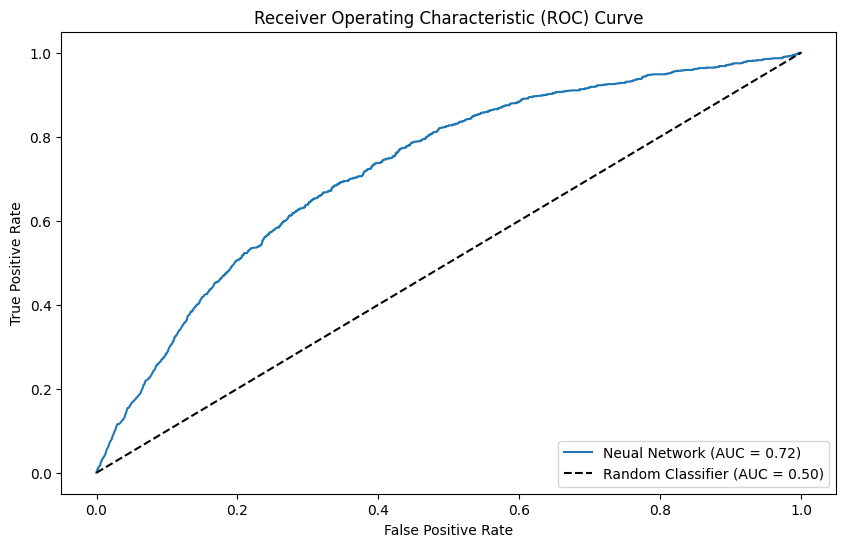

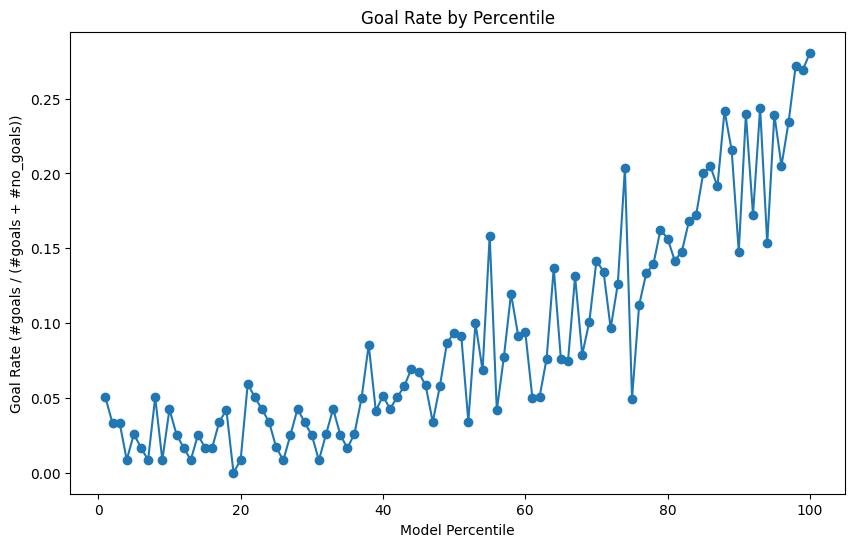

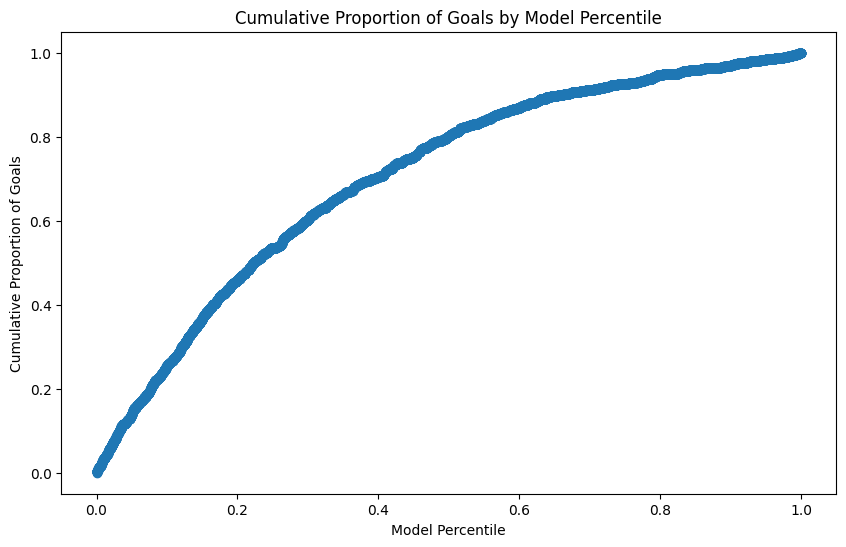

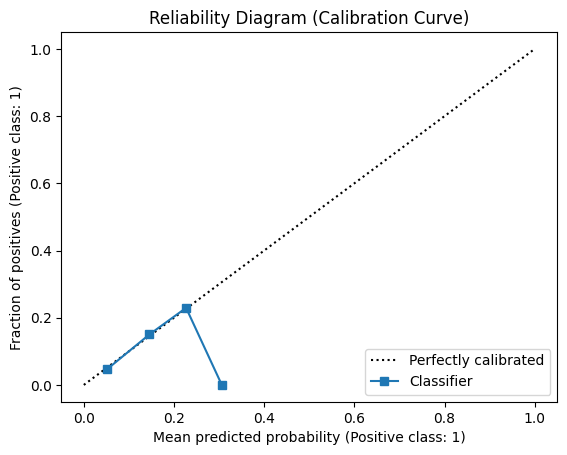

In [43]:
# Neural Network
# # distance only
# roc_curve_and_auc(y_val, nn_predictions["Distance Only"]["y_prob"],"Neural Network")
# goal_rate_by_percentile(y_val, nn_predictions["Distance Only"]["y_prob"])
# cumulative_proportion_of_goals(y_val, nn_predictions["Distance Only"]["y_prob"])

# # angle only
# roc_curve_and_auc(y_val, nn_predictions["Angle Only"]["y_prob"],"Decision Tree")
# goal_rate_by_percentile(y_val, nn_predictions["Angle Only"]["y_prob"])
# cumulative_proportion_of_goals(y_val, nn_predictions["Angle Only"]["y_prob"])

# #  distance + angle
# roc_curve_and_auc(y_val, nn_predictions["Distance + Angle"]["y_prob"],"Decision Tree")
# goal_rate_by_percentile(y_val, nn_predictions["Distance + Angle"]["y_prob"])
# cumulative_proportion_of_goals(y_val, nn_predictions["Distance + Angle"]["y_prob"])

# Neural Network Models
nn_model =  MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', solver='adam', max_iter=200, random_state=42).fit(X_train, y_train)
nn_predictions = {
    "y_pred": nn_model.predict(X_val[features]),
    "y_prob": nn_model.predict_proba(X_val[features])[:, 1]
}
roc_curve_and_auc(y_val, nn_predictions["y_prob"],"Neual Network")
goal_rate_by_percentile(y_val, nn_predictions["y_prob"])
cumulative_proportion_of_goals(y_val, nn_predictions["y_prob"])



In [ ]:
# Random Baseline
predictions["Random Baseline"] = {
    "y_prob": np.random.uniform(0, 1, len(y_val))
}

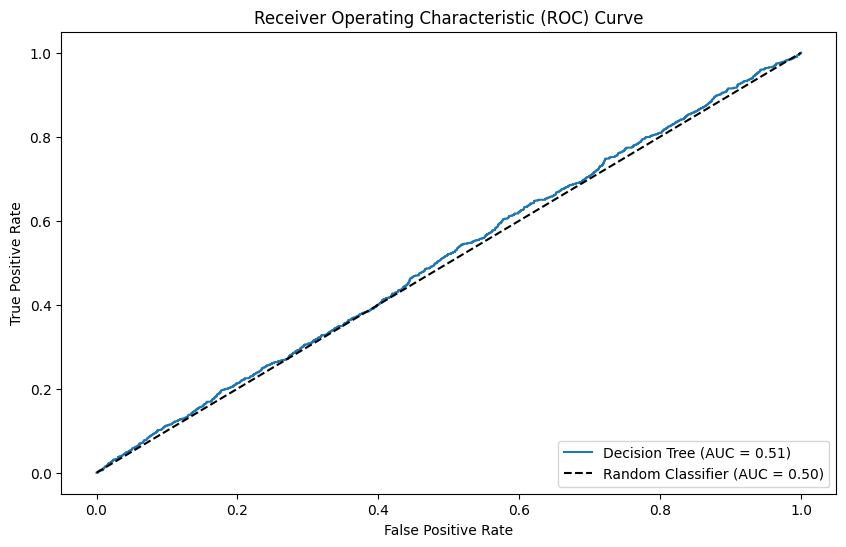

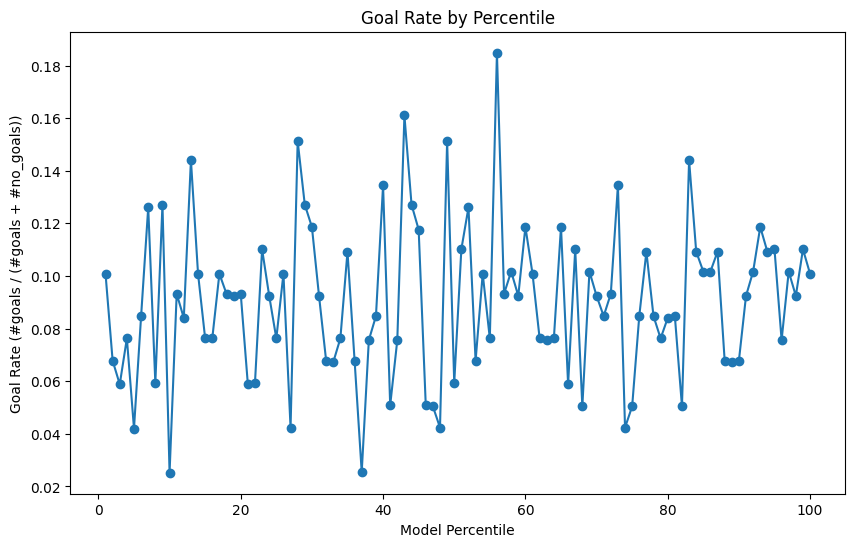

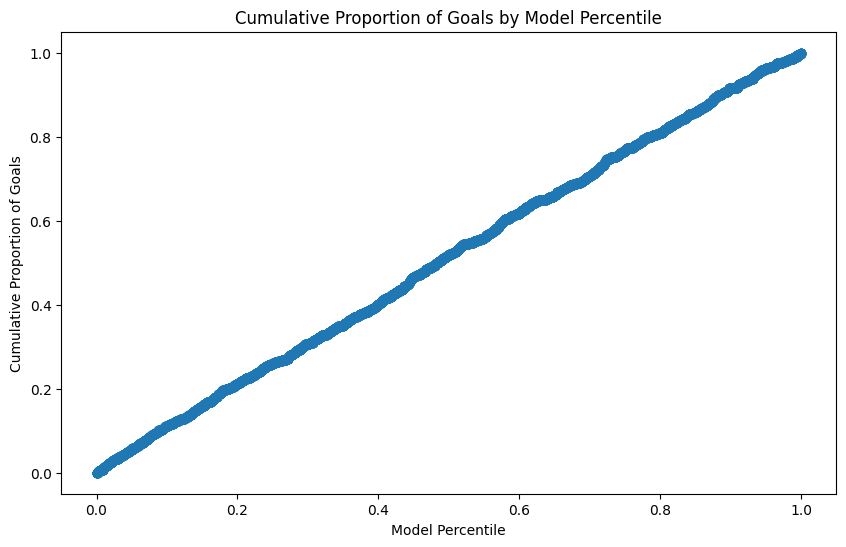

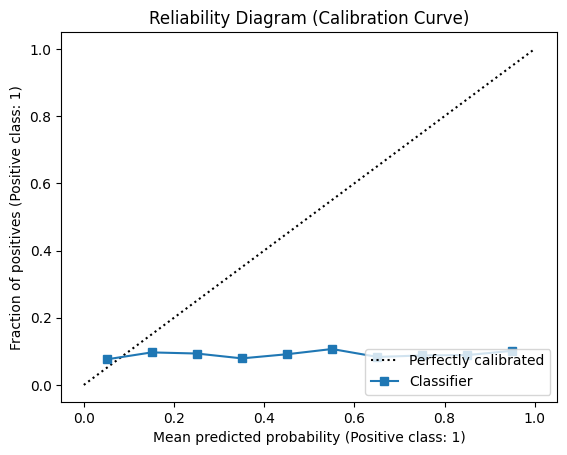

In [78]:
roc_curve_and_auc(y_val, predictions["Random Baseline"]["y_prob"])
goal_rate_by_percentile(y_val, predictions["Random Baseline"]["y_prob"])
cumulative_proportion_of_goals(y_val, predictions["Random Baseline"]["y_prob"])